In [1]:
import os
import sys

import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib import gridspec

get_ipython().magic(u'matplotlib inline')

sys.path.append('../3_analyze')
from containers import Dataset
from score_query import ScoreQuery
from utils import export, show_side_by_side, load_score_file
from statistics import *

sys.path.append('../1_dock')
from parse_chembl import load_chembl_raw, load_chembl_proc
from core_proc import load_matches

In [2]:
data = '/scratch/PI/rondror/jbelk/method/data'
glide_dir = 'docking/glide12'
ifp_dir = 'ifp/ifp1'
mcss_dir = 'mcss/mcss1'

In [3]:
prot_list = ['B1AR']
struct_dict = {'AR':'2PNU','A2AR':'2YDO','B1AR':'2VT4','B2AR':'2RH1','CHK1':'2BRN', 'PLK1':'2OWB',
               'VITD':'2HB7','BRAF':'3IDP','JAK2':'3KRR','CDK2':'1H1S','ERA':'1A52','GCR':'3K23'}

features = {
    'mcss':[],
    'hbond':[2,3],
    'sb':[4],
    #'pipi1':[5],
    'pipi':[6],
    #'picat':[7,8],
    #'c1':[10],
    'contact':[11]
}

all_data = Dataset(data, prot_list)

all_data.load_docking(glide_dir, ifp_dir, mcss_dir, structs=struct_dict,
                      load_fp=True, load_crystal=False, load_chembl=False, load_mcss=True)

In [4]:
stats = Statistics(all_data, prot_list, 9, 100, features)

sb


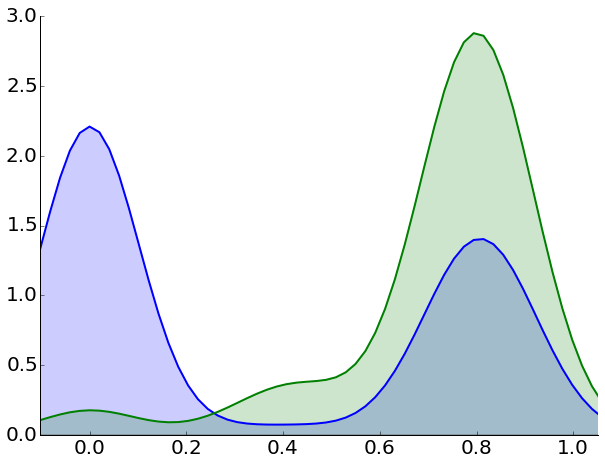

mcss


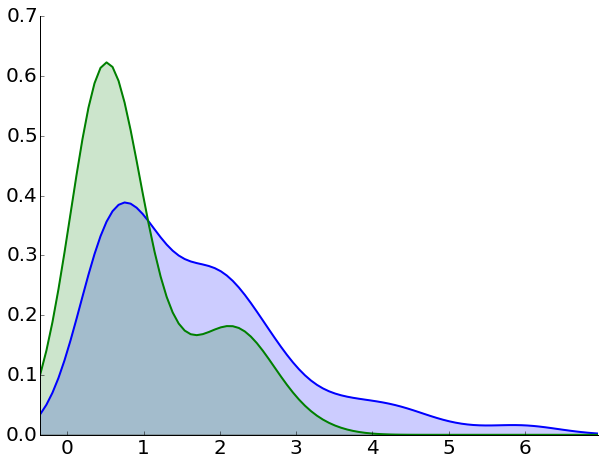

contact


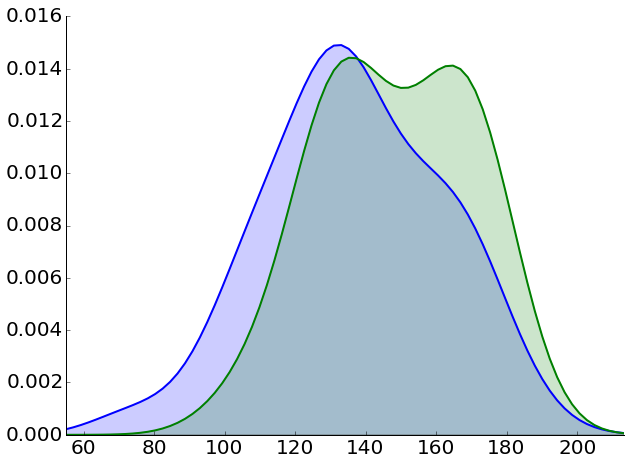

pipi


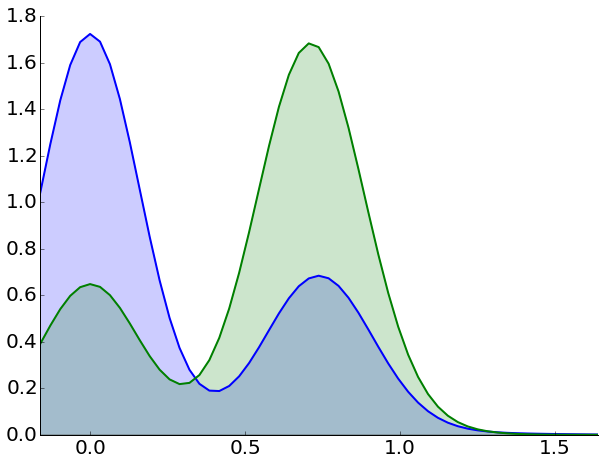

hbond


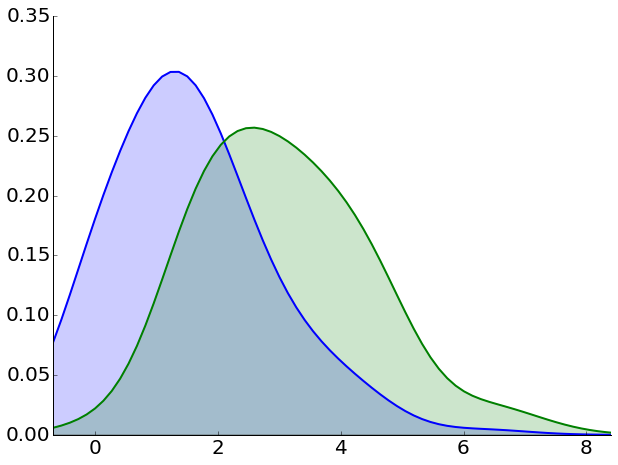

In [5]:
for f_name in features.keys():
    print f_name
    stats.show_stats(f_name, raw=False, smoothed=True)